# Home Equity Loan Default 

The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics: <br><br>
◾ BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan <br>
◾ LOAN: Amount of the loan request <br>
◾ MORTDUE: Amount due on existing mortgage <br>
◾ VALUE: Value of current property <br>
◾ REASON: DebtCon = debt consolidation; HomeImp = home improvement <br>
◾ JOB: Occupational categories <br>
◾ YOJ: Years at present job <br>
◾ DEROG: Number of major derogatory reports <br>
◾ DELINQ: Number of delinquent credit lines <br>
◾ CLAGE: Age of oldest credit line in months <br>
◾ NINQ: Number of recent credit inquiries <br>
◾ CLNO: Number of credit lines <br>
◾ DEBTINC: Debt-to-income ratio <br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b> Loading HMEQ Dataset </b>

In [2]:
df = pd.read_csv("hmeq.csv")

In [3]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


<b> Exploratory Data Analysis </b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [6]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


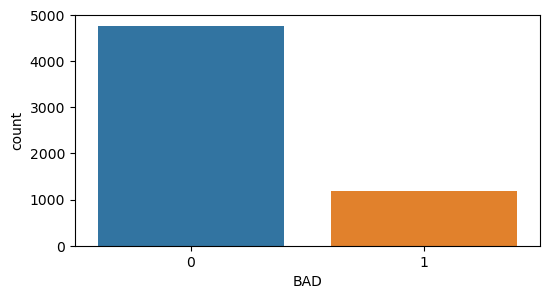

In [7]:
plt.figure(figsize=(6,3))
sns.countplot(x= 'BAD' , data = df)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

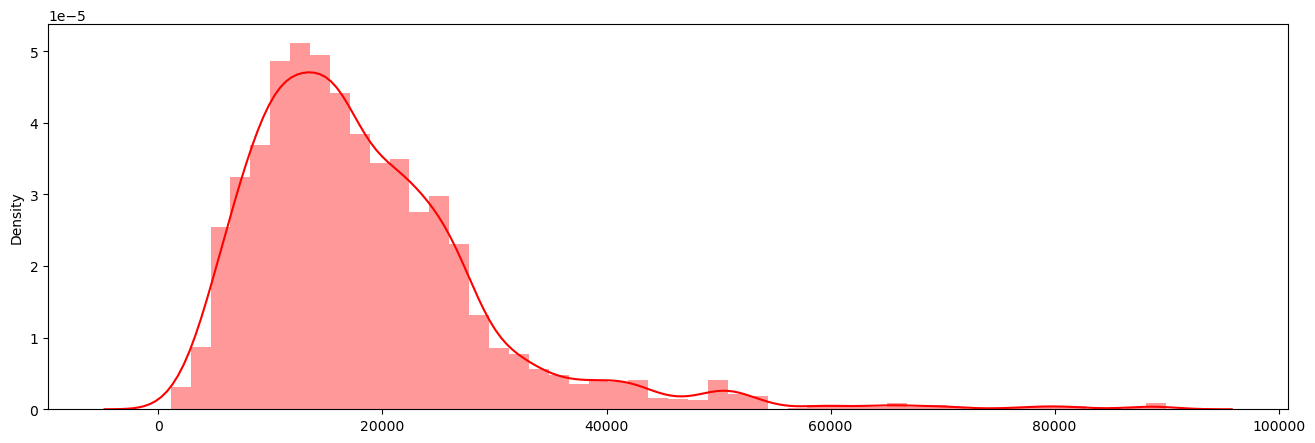

In [8]:
plt.figure(figsize=(16,5))
Loan_request = df['LOAN'].values
sns.distplot(Loan_request, color='red')


<b>Categorical variables</b>

In [9]:
df.loc[df.BAD == 1, 'STATUS'] = 'DEFAULT'
df.loc[df.BAD == 0, 'STATUS'] = 'PAID'

In [10]:
g = df.groupby('REASON')
g['STATUS'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

In [11]:
g = df.groupby('JOB')
g['STATUS'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

<b>Correlation between variables</b>

In [12]:
variables = ['BAD','LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
df_corr = df[variables].corr()
df_corr

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.048219,-0.029954,-0.060238,0.276081,0.354107,-0.170499,0.174980,-0.004157,0.199835
LOAN,-0.075099,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,-0.048219,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,-0.029954,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,-0.060238,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,0.276081,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,0.354107,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,-0.170499,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.174980,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,-0.004157,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539


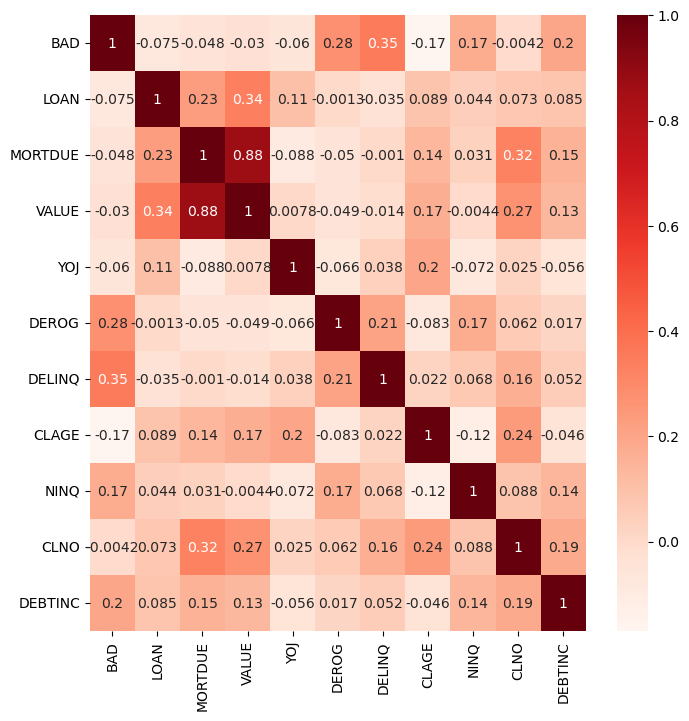

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, cmap='Reds',annot=True)
plt.show()

<b>Dealing with missing values</b>

In [14]:
new_df = df.interpolate()

In [15]:
new_df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,STATUS
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,DEFAULT
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,DEFAULT
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,DEFAULT
3,1,1500,55650.0,64350.0,NaN,NaN,3.5,0.0,0.0,121.400000,0.5,12.0,NaN,DEFAULT
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,PAID
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,DEFAULT
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,36.999254,DEFAULT
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,DEFAULT
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,33.567536,DEFAULT
9,1,2000,27654.0,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,30.250178,DEFAULT


In [16]:
new_df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     252
JOB        279
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      5
STATUS       0
dtype: int64

In [17]:
new_df = new_df.fillna(new_df.mode().iloc[0])

In [18]:
new_df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
STATUS     0
dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix


<b>Transforming categorical variables</b>

In [20]:
def categorical_variables(df):
    object_cols = ['REASON', 'JOB']
    label_encoder = LabelEncoder()
    for col in object_cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df

In [21]:
credit_df = categorical_variables(new_df)

In [22]:
credit_df = credit_df.drop('STATUS',axis = 1)

In [23]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   int32  
 5   JOB      5960 non-null   int32  
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int32(2), int64(2)
memory usage: 558.9 KB


<b>Applying Train Test Split</b>

In [24]:
y = credit_df['BAD'].values
print(y)

[1 1 1 ... 0 0 0]


In [25]:
x_df = credit_df.drop('BAD', axis = 1)
x = x_df.values
print(x)

[[1.10000000e+03 2.58600000e+04 3.90250000e+04 ... 1.00000000e+00
  9.00000000e+00 5.24499215e-01]
 [1.30000000e+03 7.00530000e+04 6.84000000e+04 ... 0.00000000e+00
  1.40000000e+01 5.24499215e-01]
 [1.50000000e+03 1.35000000e+04 1.67000000e+04 ... 1.00000000e+00
  1.00000000e+01 5.24499215e-01]
 ...
 [8.92000000e+04 5.40450000e+04 9.29240000e+04 ... 0.00000000e+00
  1.50000000e+01 3.55565905e+01]
 [8.98000000e+04 5.03700000e+04 9.18610000e+04 ... 0.00000000e+00
  1.60000000e+01 3.43408824e+01]
 [8.99000000e+04 4.88110000e+04 8.89340000e+04 ... 0.00000000e+00
  1.60000000e+01 3.45715191e+01]]


In [26]:
X_train, X_test, Y_train, y_test = train_test_split(x, y, train_size=0.8)

In [27]:
print(f'X_train size {X_train.shape},X_test: {X_test.shape}, Y_train: {Y_train.shape}, Y_test {y_test.shape}')

X_train size (4768, 12),X_test: (1192, 12), Y_train: (4768,), Y_test (1192,)


<b>Machine Learning Model - Logistic Regression</b>

In [28]:
regression_model = LogisticRegression()
regression_model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
regression_model.score(X_train, Y_train)

0.799496644295302

In [30]:
regression_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
regression_model_predict = regression_model.predict(X_test)

In [32]:
regression_model.score(X_test, y_test)

0.8045302013422819

In [33]:
accuracy = accuracy_score(y_test, regression_model_predict)
print('Accuracy predict: %.2f%%' % (accuracy * 100.0))

Accuracy predict: 80.45%


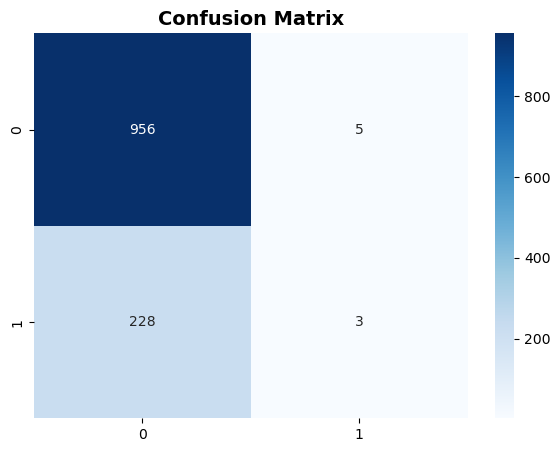

In [34]:
plt.figure(figsize=(7,5))

sns.heatmap(confusion_matrix(y_test,regression_model_predict), annot=True, cmap='Blues', fmt='g')

plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.show()

In [35]:
regression_model.predict([[2,1,3,9,0,0,3,5,3,4,8,7]])

array([1], dtype=int64)

In [36]:
regression_model.predict([[8440,89000,91021,1,3,10.5,2,3,215,2,12,42]])

array([0], dtype=int64)

<b>Machine Learning Model - Random Forest</b> 

In [37]:
rfc_model= RandomForestClassifier()
rfc_model.fit(X_train, Y_train)

RandomForestClassifier()

In [38]:
rfc_model_predict = rfc_model.predict(X_test)

In [39]:
rfc_model.score(X_test, y_test)

0.9085570469798657

In [40]:
accuracy = accuracy_score(y_test, rfc_model_predict)
print('Accuracy predict: %.2f%%' % (accuracy * 100.0))

Accuracy predict: 90.86%


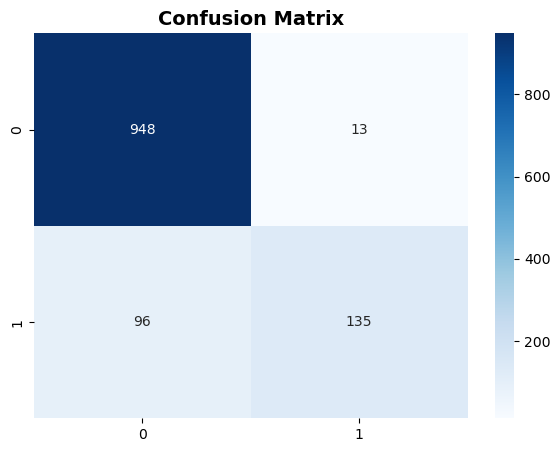

In [41]:
plt.figure(figsize=(7,5))

sns.heatmap(confusion_matrix(y_test,rfc_model_predict), annot=True, cmap='Blues', fmt='g')

plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.show()

<b>Machine Learning Model - Naive Bayes Gaussian</b>

In [43]:
nbg_model= GaussianNB()
nbg_model.fit(X_train, Y_train)

GaussianNB()

In [44]:
nbg_model_predict = nbg_model.predict(X_test)

In [46]:
nbg_model.score(X_test, y_test)

0.8154362416107382

In [47]:
accuracy = accuracy_score(y_test, nbg_model_predict)
print('Accuracy predict: %.2f%%' % (accuracy * 100.0))

Accuracy predict: 81.54%


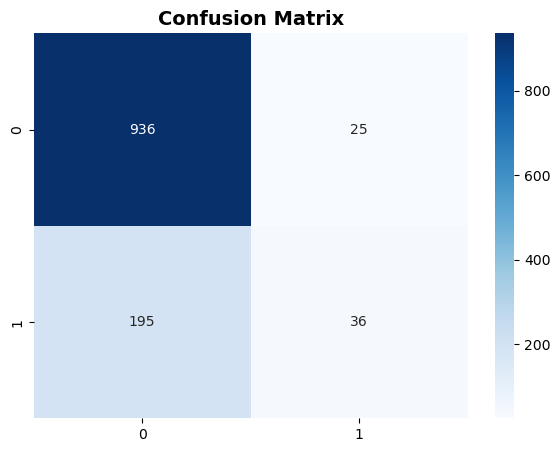

In [48]:
plt.figure(figsize=(7,5))

sns.heatmap(confusion_matrix(y_test,nbg_model_predict), annot=True, cmap='Blues', fmt='g')

plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.show()